Human Activity Recognition with Smartphones

https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones

Davide Anguita, Alessandro Ghio, Luca Oneto, Xavier Parra and Jorge L. Reyes-Ortiz. A Public Domain Dataset for Human Activity Recognition Using Smartphones. 21st European Symposium on Artificial Neural Networks, Computational Intelligence and Machine Learning, ESANN 2013. Bruges, Belgium 24-26 April 2013.

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.utils import shuffle

# Load up the data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train = shuffle(train)
test = shuffle(test)

# let's take a gander
display(train.head())

print train.shape
print test.shape

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
1151,0.322563,0.001762,-0.099583,-0.077319,0.163397,-0.366976,-0.150695,0.081617,-0.354550,0.417399,...,-0.273368,-0.258125,-0.394798,0.890667,0.550559,-0.672006,0.324277,0.032366,6,WALKING_UPSTAIRS
4926,0.273518,-0.015485,-0.099208,-0.994748,-0.989076,-0.983350,-0.995697,-0.990311,-0.984223,-0.938327,...,-0.355408,-0.024263,-0.120520,-0.124300,-0.295777,-0.651881,-0.068769,-0.163118,23,SITTING
2018,0.348976,0.008519,-0.171332,0.258261,0.066264,-0.193373,0.252908,0.008215,-0.185317,0.455011,...,-0.916922,-0.184415,0.777533,0.850702,0.827569,-0.753401,0.223178,-0.101939,11,WALKING_DOWNSTAIRS
2931,0.279097,-0.015661,-0.105164,-0.996365,-0.994423,-0.989382,-0.997014,-0.993650,-0.990283,-0.937397,...,-0.812685,-0.075841,-0.225018,-0.351919,0.015259,-0.881652,0.114711,0.102710,16,SITTING
5023,0.449566,-0.025920,-0.091716,0.255458,0.215342,0.248882,0.146518,0.127807,0.178287,0.516075,...,-0.636093,-0.801188,0.719251,0.882085,-0.364118,-0.819634,0.157803,0.132478,23,WALKING_DOWNSTAIRS


(7352, 563)
(2947, 563)


In [3]:
# Seperate subject information
subject_training_data = train['subject']
subject_testing_data = test['subject']

# Seperate labels
training_labels = train['Activity']
testing_labels = test['Activity']

# Drop labels and subject info from data
train = train.drop(['subject', 'Activity'], axis=1)
test = test.drop(['subject', 'Activity'], axis=1)

# Print some information about our data
print "Training data consists of {} instances of data with {} total features".format(train.shape[0], train.shape[1])
print "Training data includes value counts of\n", training_labels.value_counts()
print "Testing data consists of {} instances of data".format(test.shape[0])
print "Testing data includes value counts of\n", testing_labels.value_counts()

Training data consists of 7352 instances of data with 561 total features
Training data includes value counts of
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64
Testing data consists of 2947 instances of data
Testing data includes value counts of
LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: Activity, dtype: int64


In [4]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
#from sklearn.manifold import TSNE

#scaler = MinMaxScaler()
#scaled_trainingdata = scaler.fit_transform(train)

# Encode our categorical labels into numerical target labels
le = LabelEncoder()
le = le.fit(["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"])
enc_training_labels = le.transform(training_labels)
enc_testing_labels = le.transform(testing_labels)


#tsne = TSNE(init = 'pca')
#tsne_vis = tsne.fit_transform(scaled_trainingdata)
#plt.scatter(tsne_vis[:,0], tsne_vis[:,1], c=encodedlabels)

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier 

#Let's try out some out-of-the-box classifiers and see how they perform
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xt = ExtraTreesClassifier()
kn = KNeighborsClassifier()

def evaluateclf(clf):
    scores = cross_val_score(clf, train, enc_training_labels)
    avg = scores.mean()
    return "performances: {}, \nAverage: {}".format(scores, avg)

print "Decision Tree {}".format(evaluateclf(dt))

print "Random Forest {}".format(evaluateclf(rf))

print "Extra Trees {}".format(evaluateclf(xt))

print "K Neighbors {}".format(evaluateclf(kn))

Decision Tree performances: [ 0.93393148  0.93637847  0.93913399], 
Average: 0.936481312663
Random Forest performances: [ 0.96655791  0.9677814   0.97222222], 
Average: 0.968853845689
Extra Trees performances: [ 0.96615008  0.9677814   0.96813725], 
Average: 0.967356246468
K Neighbors performances: [ 0.96615008  0.95880914  0.9620098 ], 
Average: 0.962323006962


In [6]:
from sklearn.model_selection import RandomizedSearchCV

#Extremely Random Trees classifier looks promising, let's fine tune some hyper-parameters and see how much we can improve
parameters = {'n_estimators': np.arange(20,200,20), 'min_samples_split': np.arange(2,10,2)}

randgrid = RandomizedSearchCV(xt, parameters, n_iter = 30, n_jobs = 4, verbose = 3)

randgrid = randgrid.fit(train, enc_training_labels)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   34.2s
[Parallel(n_jobs=4)]: Done  90 out of  90 | elapsed:  1.7min finished


In [7]:
print randgrid.best_estimator_
print randgrid.best_score_

# We'll train the model and hyper-parameters which produced the best 3-fold cross-validation score
xt = randgrid.best_estimator_
xt.fit_transform(train, enc_training_labels)

# Check the performance of the tuned and trained model on the testing set
print "Testing score for extra random trees is {:.4f}".format(xt.score(test, enc_testing_labels))

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=180, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
0.985446137106


C:\Users\Sunny\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


Testing score for extra random trees is 0.9423


In [8]:
from keras.utils.np_utils import to_categorical

# Now let's experiment with a neural network to classify this data and see if we can improve our accuracy even further
# First we need to encode our targets as one-hot label vectors
oh_training_labels = to_categorical(enc_training_labels)
oh_testing_labels = to_categorical(enc_testing_labels)

Using Theano backend.


In [102]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

# Build a network for this classification task
model = Sequential()
model.add(Dense(96, input_dim = train.shape[1], activation = 'tanh', init = 'lecun_uniform', W_regularizer=l2(.001)))
model.add(Dropout(0.5))
model.add(Dense(30, activation = 'tanh', init = 'lecun_uniform', W_regularizer=l2(.001)))
model.add(Dropout(0.2))
model.add(Dense(24, activation = 'tanh', init = 'lecun_uniform', W_regularizer=l2(.0005)))
model.add(Dense(output_dim = 6, activation = 'softmax'))

sgd = SGD(lr = .13, momentum = .9, decay = 4e-3)
#early_stopping = EarlyStopping(monitor = 'val_acc', min_delta = .002, patience = 7, mode = 'auto')
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(train.values, oh_training_labels, nb_epoch = 120, batch_size = 50, verbose = 2,
          validation_split = .15, shuffle=True)

Train on 6249 samples, validate on 1103 samples
Epoch 1/120
0s - loss: 1.2367 - acc: 0.4673 - val_loss: 0.6198 - val_acc: 0.5956
Epoch 2/120
0s - loss: 0.9474 - acc: 0.6484 - val_loss: 0.4676 - val_acc: 0.7561
Epoch 3/120
0s - loss: 0.8080 - acc: 0.7150 - val_loss: 0.3966 - val_acc: 0.7860
Epoch 4/120
0s - loss: 0.7506 - acc: 0.7337 - val_loss: 0.3987 - val_acc: 0.7815
Epoch 5/120
0s - loss: 0.6484 - acc: 0.7702 - val_loss: 0.3127 - val_acc: 0.8296
Epoch 6/120
0s - loss: 0.6041 - acc: 0.7796 - val_loss: 0.3057 - val_acc: 0.8214
Epoch 7/120
0s - loss: 0.5788 - acc: 0.7969 - val_loss: 0.2723 - val_acc: 0.8867
Epoch 8/120
0s - loss: 0.5156 - acc: 0.8120 - val_loss: 0.3101 - val_acc: 0.8286
Epoch 9/120
0s - loss: 0.4906 - acc: 0.8321 - val_loss: 0.2759 - val_acc: 0.8685
Epoch 10/120
0s - loss: 0.4750 - acc: 0.8361 - val_loss: 0.2486 - val_acc: 0.8676
Epoch 11/120
0s - loss: 0.4247 - acc: 0.8605 - val_loss: 0.2195 - val_acc: 0.9012
Epoch 12/120
0s - loss: 0.3926 - acc: 0.8817 - val_loss: 0.

In [103]:
#implement early stopping?
nn_test_score = model.evaluate(test.values, oh_testing_labels, verbose=2)
print "Our neural network achieves an accuracy of {} on the test set".format(nn_test_score[1])

Our neural network achieves an accuracy of 0.962673905667 on the test set


Our neural network gives an improvement in accuracy of ~2% on the testing data ! :^)

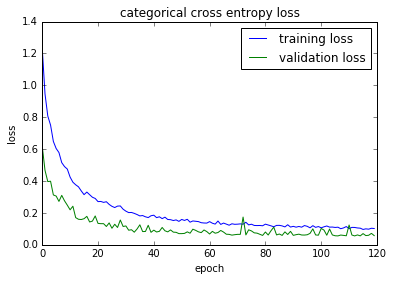

In [107]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('categorical cross entropy loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'validation loss'], loc = 'upper right' )
plt.show()